This notebook is used for checking on the improvements I make to the bloom filter application.

In [1]:
import math
import mmh3
import ngram
from nltk import ngrams
from bitarray import bitarray

from bloom_filter import BloomFilter

In [2]:
bf = BloomFilter(n=3653, f=0.01)

In [3]:
def unique_file(input_filename):
    input_file = open(input_filename, 'r')
    file_contents = input_file.read()
    input_file.close()
    word_list = file_contents.split()

    output_list = []
    
    unique_words = set(word_list)
    for word in unique_words:   
        output_list.append(word)

    return output_list

In [4]:
ex_list = unique_file('example_text.txt')

In [5]:
len(ex_list)

7307

In [6]:
train = ex_list[:len(ex_list)//2]
test = ex_list[len(ex_list)//2:]

In [7]:
for i in range(len(train)):
    bf.add(train[i])

In [8]:
false_pos_counter = 0
for i in range(len(test)):
    boo = bf.query(test[i])
    if boo:
        false_pos_counter += 1
    
false_pos_rate = false_pos_counter / len(test)    
        

In [9]:
false_pos_rate

0.0

I created a list of unique words (length of 3653)to add into the bloom filter. After doing so, I took another list of unique words (length of 3653) to query in the bloom filter. This should mean that there are no false positives because they are all unique, yet the bloom filter will identify some as positive. I want to examine the false positive rate.

For the initial implementation of the bloom filter, before trying improvements, we had a very high false positive rate (0.45).

The first improvement I made was changing the number k of hash functions and just keeping a singular mmh3 hash function. The following graph shows how the less hash functions there were, the better the false positive rate.

In [10]:
false_poses = [0.09, 0.18, 0.34, 0.56]
k = [1, 2, 4, 8]

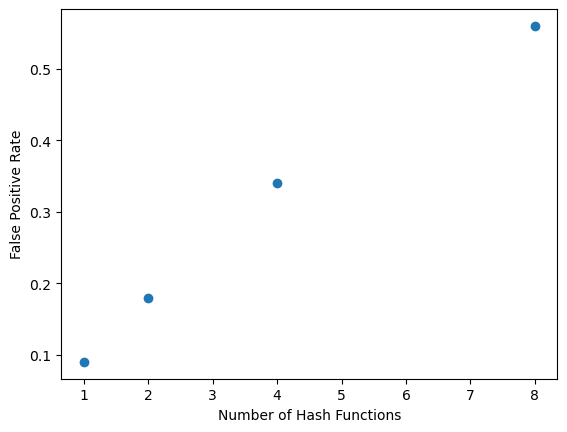

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = k
y = false_poses

plt.scatter(x, y)
plt.xlabel("Number of Hash Functions")
plt.ylabel("False Positive Rate")
plt.show()

The next implementation I experimented with was a counting bloom filter. This ended up bringing the false positive rate down to 0.